In [13]:
import pandas as pd
import matplotlib.pyplot as plt

### Analisis general del dataset

In [ ]:
# Abro el dataframe con pandas
df = pd.read_csv("./AbandonoDeClientes.csv")

# Muestro 5 filas al azar
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
266,267,15653857,Wallis,498,France,Male,34,2,0.00,2,1,1,148528.24,0
4136,4137,15757952,Teng,651,France,Male,44,2,0.00,3,1,0,102530.35,1
8131,8132,15803352,Scott,613,Germany,Male,33,3,155736.42,2,1,1,57751.21,0
7829,7830,15625445,Parkin,572,France,Female,36,8,68348.18,2,0,1,50400.32,0
7058,7059,15671769,Zikoranachidimma,624,France,Female,71,4,170252.05,3,1,1,73679.59,1


In [9]:
# Muestro información sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Muestro una descripción sobre las columnas del dataframe
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Muestro los valores nulos del dataframe
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Muestro los valores duplicados del dataframe
df.duplicated().sum()

0

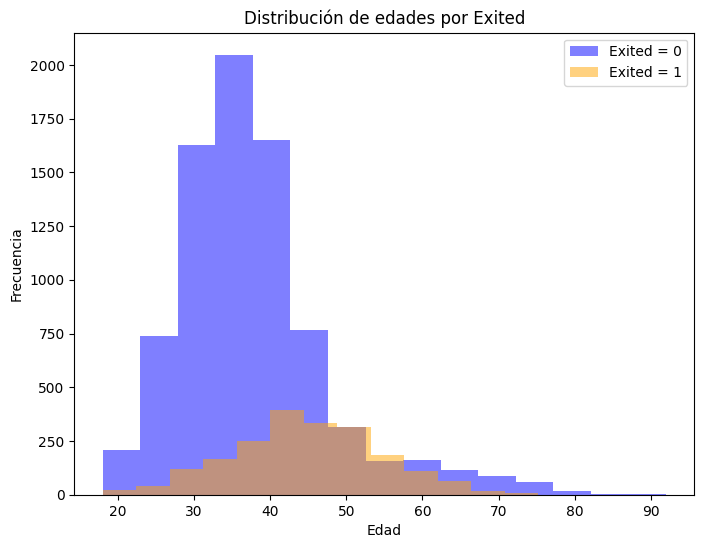

In [14]:
# Filtrar las edades según Exited
age_exited_0 = df[df['Exited'] == 0]['Age']
age_exited_1 = df[df['Exited'] == 1]['Age']

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(age_exited_0, bins=15, alpha=0.5, label='Exited = 0', color='blue')
plt.hist(age_exited_1, bins=15, alpha=0.5, label='Exited = 1', color='orange')
plt.title("Distribución de edades por Exited")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()
